In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__)

2.6.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(train_images, tarain_label), (test_images, test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
tarain_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

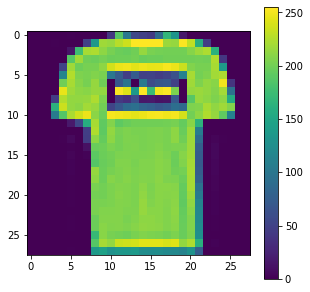

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

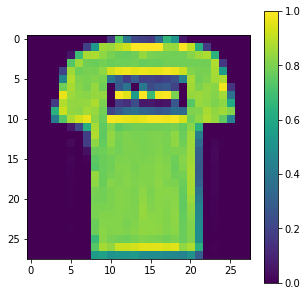

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

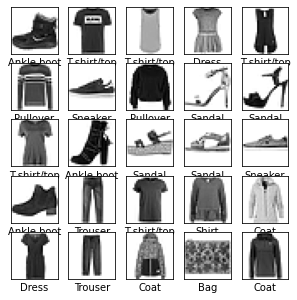

In [14]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[tarain_label[i]])
plt.show()

In [19]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu),
                           keras.layers.Dense(10, activation=tf.nn.softmax)])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) 

In [21]:
model.fit(train_images, tarain_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4971 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3337 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8927


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8667


In [23]:
predictions = model.predict(test_images)


In [24]:
predictions[0]

array([1.49558048e-06, 3.13876001e-07, 1.21137385e-08, 2.81943272e-07,
       4.61556681e-07, 3.35124368e-03, 8.58259853e-07, 3.17501985e-02,
       5.16867221e-05, 9.64843512e-01], dtype=float32)

In [25]:
#위 프리딕션값에서 제일 큰 값 도출
np.argmax(predictions[0])

9

In [26]:
#실제 테스트 0번째그림의 라벨과 비교
test_label[0]

9